In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
uber_data = pd.read_csv("/content/uber.csv")


In [3]:
print("Missing values in each column:\n", uber_data.isnull().sum())

Missing values in each column:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [22]:
uber_data.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8


In [23]:
uber_data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month
count,1.865400e+05,186540.000000,186540.000000,186540.000000,186540.000000,186540.000000,186540.000000,186540.000000,186540.000000,186540.000000
mean,2.770726e+07,10.156343,-73.977573,40.752004,-73.975229,40.752058,1.588260,13.499008,3.048601,6.277871
std,1.600717e+07,6.414096,0.073354,0.042177,0.064461,0.041353,1.153263,6.532397,1.946085,3.441548
min,1.000000e+00,-10.900000,-93.824668,32.005119,-75.458979,34.894485,0.000000,0.000000,0.000000,1.000000
25%,1.382615e+07,6.000000,-73.992391,40.737088,-73.991596,40.736270,1.000000,9.000000,1.000000,3.000000
50%,2.774014e+07,8.100000,-73.982273,40.753595,-73.980658,40.754075,1.000000,14.000000,3.000000,6.000000
75%,4.153566e+07,12.100000,-73.969132,40.767700,-73.966047,40.768447,2.000000,19.000000,5.000000,9.000000
max,5.542357e+07,41.040000,-67.370360,48.018760,-54.294363,45.031598,5.000000,23.000000,6.000000,12.000000


In [24]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186540 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         186540 non-null  int64  
 1   fare_amount        186540 non-null  float64
 2   pickup_longitude   186540 non-null  float64
 3   pickup_latitude    186540 non-null  float64
 4   dropoff_longitude  186540 non-null  float64
 5   dropoff_latitude   186540 non-null  float64
 6   passenger_count    186540 non-null  int64  
 7   hour               186540 non-null  int32  
 8   day_of_week        186540 non-null  int32  
 9   month              186540 non-null  int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 13.5 MB


In [27]:
uber_data.shape

(186540, 10)

In [29]:
uber_data.dtypes

,0
Unnamed: 0,int64
fare_amount,float64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
hour,int32
day_of_week,int32
month,int32


In [30]:
uber_data.notnull()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
199995,True,True,True,True,True,True,True,True,True,True
199996,True,True,True,True,True,True,True,True,True,True
199997,True,True,True,True,True,True,True,True,True,True
199998,True,True,True,True,True,True,True,True,True,True


In [32]:
uber_data.notnull().sum()

,0
Unnamed: 0,186540
fare_amount,186540
pickup_longitude,186540
pickup_latitude,186540
dropoff_longitude,186540
dropoff_latitude,186540
passenger_count,186540
hour,186540
day_of_week,186540
month,186540


In [4]:
uber_data = uber_data.dropna()

In [5]:
uber_data['pickup_datetime'] = pd.to_datetime(uber_data['pickup_datetime'])

In [6]:
uber_data['hour'] = uber_data['pickup_datetime'].dt.hour
uber_data['day_of_week'] = uber_data['pickup_datetime'].dt.dayofweek
uber_data['month'] = uber_data['pickup_datetime'].dt.month


In [7]:
uber_data = uber_data.drop(columns=['pickup_datetime', 'key'])


In [8]:
z_scores = np.abs(stats.zscore(uber_data.select_dtypes(include=[np.number])))
print("Number of outliers detected (Z > 3):", (z_scores > 3).sum().sum())
uber_data = uber_data[(z_scores < 3).all(axis=1)]


Number of outliers detected (Z > 3): 25353


In [34]:
from scipy import stats
import numpy as np


z_scores = np.abs(stats.zscore(uber_data.select_dtypes(include=[np.number])))


threshold = 3


print("Number of outliers detected (Z > 3):", (z_scores > threshold).sum().sum())

uber_data_clean = uber_data[(z_scores < threshold).all(axis=1)]


print("Shape of original data:", uber_data.shape)
print("Shape of data after removing outliers:", uber_data_clean.shape)


Number of outliers detected (Z > 3): 6431
Shape of original data: (186540, 10)
Shape of data after removing outliers: (180936, 10)


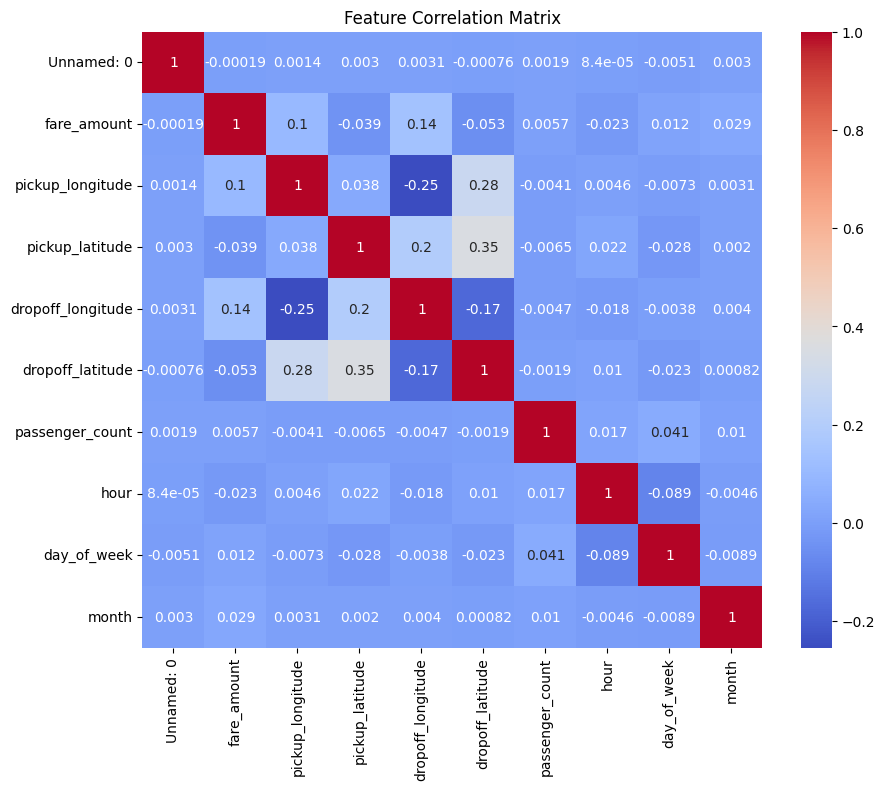

In [35]:
correlation_matrix = uber_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [36]:
X = uber_data.drop(columns=["fare_amount"])
y = uber_data["fare_amount"]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

In [40]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_reg.predict(X_test_scaled)

In [41]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)


Lasso(alpha=0.1)

In [42]:
y_pred_lasso = lasso_reg.predict(X_test_scaled)

In [43]:
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, r2, mae

In [44]:
rmse_lin, r2_lin, mae_lin = evaluate_model(y_test, y_pred_lin)


In [45]:

rmse_ridge, r2_ridge, mae_ridge = evaluate_model(y_test, y_pred_ridge)

In [46]:
rmse_lasso, r2_lasso, mae_lasso = evaluate_model(y_test, y_pred_lasso)


In [47]:

print("Linear Regression: RMSE = {:.2f}, R2 = {:.2f}, MAE = {:.2f}".format(rmse_lin, r2_lin, mae_lin))
print("Ridge Regression: RMSE = {:.2f}, R2 = {:.2f}, MAE = {:.2f}".format(rmse_ridge, r2_ridge, mae_ridge))
print("Lasso Regression: RMSE = {:.2f}, R2 = {:.2f}, MAE = {:.2f}".format(rmse_lasso, r2_lasso, mae_lasso))

Linear Regression: RMSE = 6.24, R2 = 0.07, MAE = 4.48
Ridge Regression: RMSE = 6.24, R2 = 0.07, MAE = 4.48
Lasso Regression: RMSE = 6.26, R2 = 0.06, MAE = 4.50
